In [1]:
import Utils

model = Utils.load_model('fine_tunning_vgg16_hit_65%.h5')
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 3)         6         
_________________________________________________________________
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 7175      
Total params: 15,247,181
Trainable params: 15,247,181
Non-trainable params: 0
________________________________________________________________

In [2]:
predict = Utils.evaluate_model(model)
print('the accuracy on test data: %.4f' % (predict[1]))

Found 3589 images belonging to 7 classes.
the accuracy on test data: 0.6509


In [3]:
layer_name = 'dense_3'
train_features, train_labels = Utils.feature_extractor_to_svm(Utils.train_dir, model, layer_name=layer_name)
validation_features, validation_labels = Utils.feature_extractor_to_svm(Utils.validation_dir, model, layer_name=layer_name)
test_features, test_labels = Utils.feature_extractor_to_svm(Utils.test_dir, model, layer_name=layer_name)

Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.
Training dataset:  28709
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
PublicTest dataset:  3589
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
PrivateTest dataset:  3589


In [4]:
clf, acc = Utils.svc(train_features, train_labels, test_features, test_labels)
print('svm on the fine-tunning VGG16 conv base hit %2.2f%%' % (acc*100))

Start training SVM with rbf kernel funtion...
svm on the fine-tunning VGG16 conv base hit 65.34%


In [7]:
score = clf.score(test_features, test_labels)
print(score)

0.653385344107


Found 3589 images belonging to 7 classes.


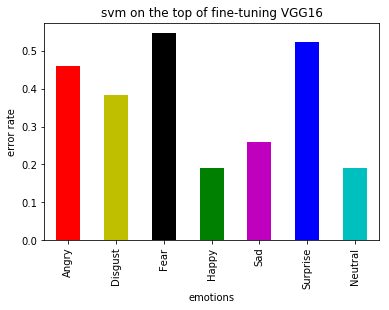

In [8]:
err = Utils.evaluate_emotions_error_rate(model)

Utils.plt_emotions(err, 'svm on the top of fine-tuning VGG16', 'svm on the top of fine-tuning VGG16 hit 65.34%.png')